In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('../Datasets/sp500.csv',parse_dates=['date'], index_col='date')
df.head()

,spx
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


# Stationarity
A simple AR(1) autoregressive model $y_t = ρ y_{t−1} + u_t$ has a unit root if $ρ = 1$, since $Δy_t = (ρ − 1)y_{t−1} + u_t$, where $\Delta$ is the difference operator. The test carried out on the residuals does not allow the use of the t-student distribution, which is why the specific Dickey–Fuller probability distribution is used.

In [3]:
sts.adfuller(df['spx']) # Non Stationary 

(1.1194986381728402,
 0.9953796476080692,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 50258.209867750025)

# Seazonality

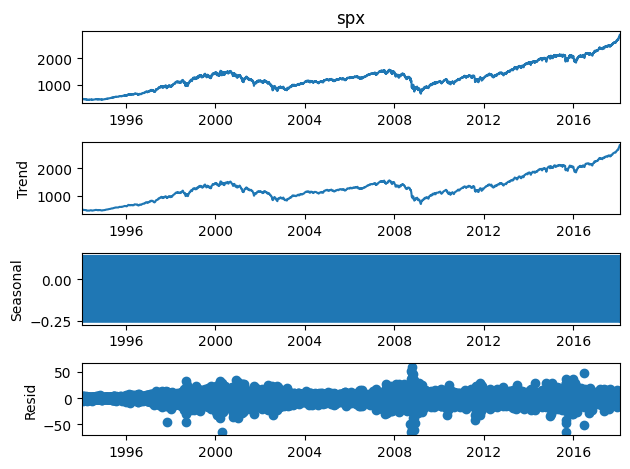

In [4]:
dec = seasonal_decompose(df['spx'], model='addtive') # there are not seazonality
dec.plot()
plt.show()

# Auto Correlation

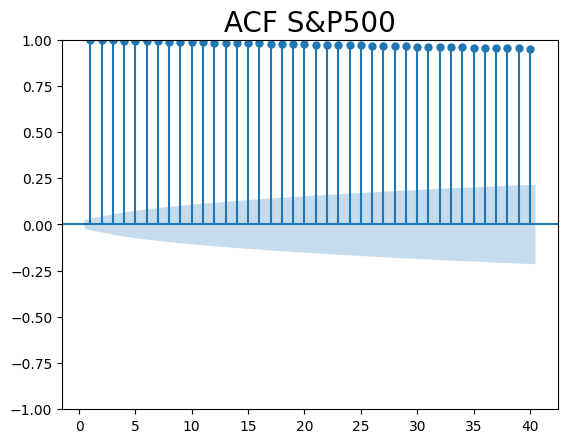

In [8]:
# AutoCorrelation Functions
sgt.plot_acf(df['spx'], lags=40, zero=False)
plt.title("ACF S&P500", size=20)
plt.show()

[]

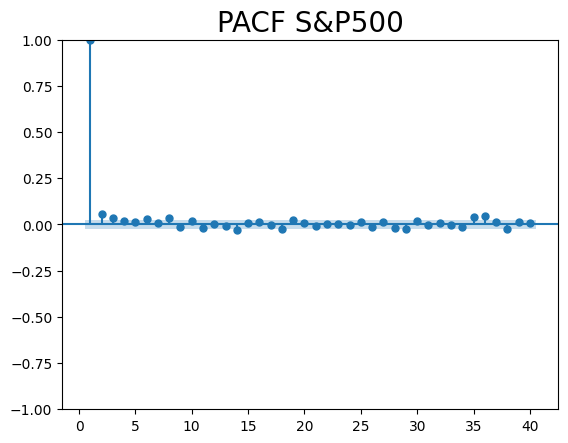

In [13]:
# Partial AutoCorrelation Function
sgt.plot_pacf(df['spx'], lags=40, zero=False, method=('ols'))
plt.title("PACF S&P500", size=20)
plt.plot() # yesterday is better to determine today prices.